In [3]:
%cd ../

/home/user/tmp


In [19]:
from os.path import join, abspath
from os import makedirs
import cv2
import numpy as np
import dlib
from matplotlib import pyplot as plt

from face_toolbox import alignment
from face_toolbox.utils import visualize
from face_toolbox.models.detector.iris_detector import IrisDetector
from face_toolbox.models.detector.face_detector import FaceAlignmentDetector
from face_toolbox.models.parser.face_parser import FaceParser

In [ ]:
output_dir = None


COLOR_EMPH  = (118, 153, 0)
COLOR_BLACK = (0, 0, 0)
COLOR_GREY  = (87, 87, 87)
COLOR_WHITE = (255, 255, 255)

In [20]:
fp = FaceParser()

In [23]:
segments = fp.parse_face(image)[0]

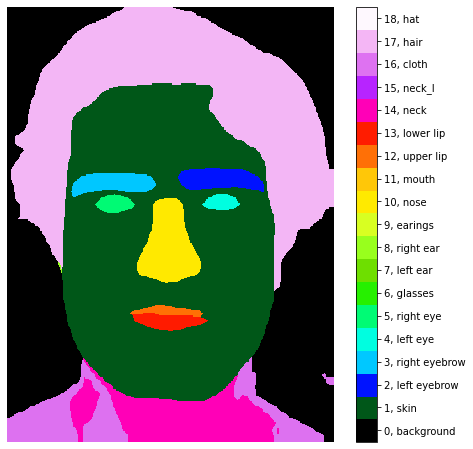

In [24]:
visualize.show_parsing_with_annos(segments)

In [7]:
landmarks_path = join('/home/user/develop/comp-vision-face/src/imgs', 'shape_predictor_68_face_landmarks.dat')
image_path = join('/home/user/develop/comp-vision-face/src/imgs', 'before_align.jpg')

detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(landmarks_path)
image = cv2.imread(image_path)

In [9]:
detections   = detector(image)
shape        = predictor(image, detections[0])
shape_arr_xy = np.array([[shape.part(i).x, shape.part(i).y] for i in range(shape.num_parts)])
shape_arr_yx = np.array([[shape.part(i).y, shape.part(i).x] for i in range(shape.num_parts)])

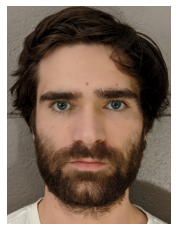

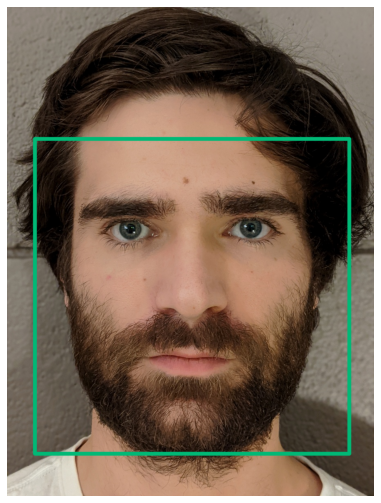

In [11]:
###### visualize test
nvidia_green = (118.0, 185.0, 0.0)

plt.imshow(image[..., ::-1])
plt.axis('off')
plt.show()

test_bbox = visualize.draw_bbox(image,
    detections[0].left(),
    detections[0].top(),
    detections[0].width(),
    detections[0].height(),
    8, nvidia_green
)

fig, ax = plt.subplots(figsize=(9, 9))
ax.imshow(test_bbox[..., ::-1])
ax.axis('off')
plt.show()

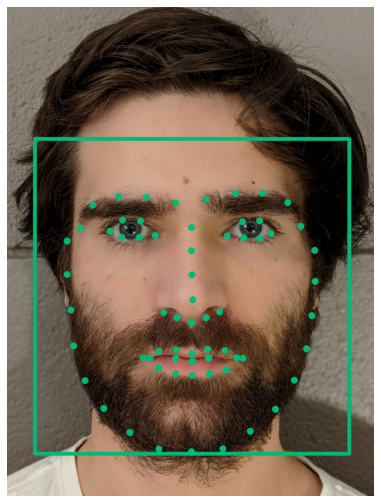

In [13]:
test_circles = visualize.draw_landmarks(test_bbox, shape_arr_xy, 8, nvidia_green)
fig, ax = plt.subplots(figsize=(9, 9))
ax.imshow(test_circles[..., ::-1])
ax.axis('off')
plt.show()

In [ ]:
landmarks_model_keras = FaceAlignmentDetector()
iris = IrisDetector()
iris.set_detector(landmarks_model_keras)
eye_landmarks = iris.detect_iris(image)

eye_landmarks_left  = eye_landmarks[0][0].astype(np.int32)
eye_landmarks_right = eye_landmarks[0][1].astype(np.int32)

[]


ValueError: zero-size array to reduction operation minimum which has no identity